In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
import librosa
import librosa.display
import IPython.display
import essentia, essentia.standard as ess
plt.rcParams['figure.figsize'] = (14,4)


### Trying to understand features of an audio using a random drum beat

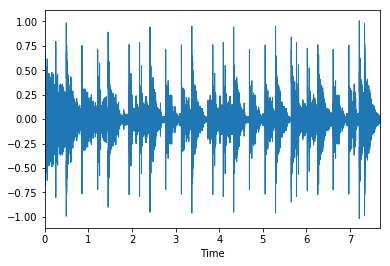

In [4]:
x,fs  =  librosa.load('test.wav')
librosa.display.waveplot(x, sr=fs)

In [5]:
IPython.display.Audio(x, rate=fs)

## Audio/Music Signal analysis
1. raw input                 : [... 0.2 0.1 0.05 -0.05 -0.1 .]
2. low-level representation  : e.g: spectral flux, ACF, cepstrum
3. mid-level representation  : e.g: pitch, onsets, beats
4. high-level representation : e.g: style, artist, mood, form


* Our aim is of speech audio to detect/differentiate emotions so we should keep our representation at the
  **LOW-LEVEL** features which will help us understand the **TIMBRE** of the voice and classify better

### Low-Level Features:
The raw input data is often too large, noisy and redundant for analysis.
* Feature extraction: input signal is transformed into a new (smaller) space of
    variables that simplify analysis.
* Features: measurable properties of the observed phenomenon, usually
    containing information relevant for pattern recognition.
* They result from neighborhood operations on the input signal. If the operation
    produces a local decision -> feature detection.
* Usually one feature is not enough: combine several features into feature
    vectors, describing a multi-dimensional space




### librosa.feature.mfcc


(20, 331)


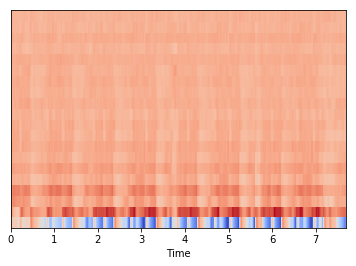

In [6]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In this case, mfcc computed 20 MFCCs over 130 frames.
The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum.
It only conveys a constant offset, i.e. adding a constant value to the entire spectrum.
Therefore, many practitioners will discard the first MFCC when performing classification.
For now, we will use the MFCCs as is.

**NOTE : 
Seeing the plot we can observe a skew in it viewing the localized blue spots.
The issue with just using these features is that they are not standard normal. So we need to convert them to a distribution with 0 mean and unit variance**

Mean over 20 mfcc : [ 2.14665479e-17  1.85316683e-17  1.80285461e-18  6.37288141e-18
  4.36039254e-18  5.70205179e-18  1.22426406e-17 -2.18019627e-17
 -8.72078509e-18 -2.54915256e-17 -8.38537028e-19  1.07332740e-17
  3.35414811e-19  1.34165924e-18 -1.91186442e-17  2.01248887e-18
 -5.86975919e-18 -5.95361290e-18  2.07957183e-17  5.36663698e-18]


Var over 20 mfcc : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


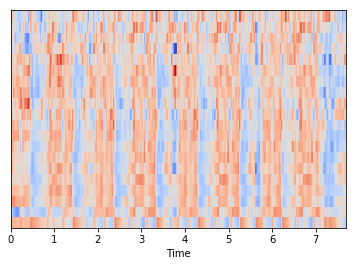

In [14]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print("Mean over 20 mfcc :" , mfccs.mean(axis=1))

print("\n\nVar over 20 mfcc :",mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=fs, x_axis='time')